In [1]:
# Name: Jeffrey Ugochukwu


# Assignment-1 (HW1)
# Guidelines:

# We will be using Python for coding. Please install Jupyter notebook (available in Anaconda Navigator) as a recommended editor tool.
# The homework should be submitted electronically through Canvas before the submission deadline.
# Hard Submission Deadline: 11:30 PM
# Late Submission is 0 credit.
# Plagiarism is a clear violation of honor code!
# Shared/copied code from any source is not allowed, as it is considered plagiarism.
# _ 0 for the corresponding assignment in the 1st attempt.
# _ F for the course in the 2nd attempt!

# Your submission should be a zip file which contains the following:
# (a) a report in pdf format (use this label "report_HW1.pdf") that includes your answers to all questions, plots, figures and any instructions to run your code,
# (b) the python code files. 

# Please pay attention to the following points:
# (a) do not include the files which are already provided to you for the assignment such as datasets,
# (b) each function should be written with the appropriate commments and documentation in the code so it is understandable.
# Please describe what your code does,and how a functionality is implemented
# (c) do not use any toolbox unless it is explicitly allowed in the homework description.

# Assignment Description:
# For this assignment, download “Auto MPG” dataset (“auto-mpg.data” file; 398 cars, 9 features; remove the 6 records with missing
# values to end up with 392 samples) that is available in the UCIMachine Learning Repository:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
# create a working directory for your assignment code, and save the dataset in a destination folder, called 'datasets'
# use the following sample code to import the dataset into pandas dataframe.
# From this point on, you need to code your solution from scratch. Unless explicitly stated,
# it is fine to use open source code, for example, sci-kit learn, to help you write your own implementation# of the methods.

In [47]:
# read the saved dataset into pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import numpy as np
import math
sns.set()
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [37]:
#displaying the first 5 rows in df
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Provide code and results in your submission addressing the following questions:

### 1: [10pt]

Allowed libraries: pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

(a) Report the percentage of the missing data and write your own code to remove the observations with missing values '?'.

(b) Next, plot the distribution of the # make of a car (for instance 'ford' is a make of a car), by processing the information provided under the 'car_name' attribute. For instance, 'chevrolet chevelle malibu' is a 'chevrolet' and you can write code to create a bar plot and show the count of observations for each make of a car such as 'ford', 'volkswagon', etc.

In [38]:
#Part A 
#Counting number of missing values
#Looking at what column has the "?" symbol (missing value)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [39]:
#Finding Percetage of ?'s in the "horsepower" column since it has them
df['horsepower'].value_counts(normalize=True) * 100

150.0    5.527638
90.00    5.025126
88.00    4.773869
110.0    4.522613
100.0    4.271357
           ...   
158.0    0.251256
77.00    0.251256
107.0    0.251256
200.0    0.251256
210.0    0.251256
Name: horsepower, Length: 94, dtype: float64

In [40]:
#To look at the dataset more empirically for value counts, there were 6 observations with ?'s so doing some simple
# math can give you an idea of what is the percentage of ?'s
(6/398)*100

1.507537688442211

In [41]:
#Deleting ?'s in horsepower column by only including rows that don't have the ?
#df['horsepower'] = df.horsepower.str.replace('?' , '116.0')
#df["horsepower"]
df[df.horsepower != '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [42]:
#Actually dropping values because the ?'s at this point would become NAN values
df.dropna(how ='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [43]:
#Part B
#Counting number of values that exist in the car_name dataframe
df["car_name"].value_counts()

ford pinto                              6
amc matador                             5
ford maverick                           5
toyota corolla                          5
amc gremlin                             4
                                       ..
toyota tercel                           1
chevrolet woody                         1
pontiac safari (sw)                     1
chrysler lebaron town @ country (sw)    1
amc ambassador brougham                 1
Name: car_name, Length: 305, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text major ticklabel objects>)

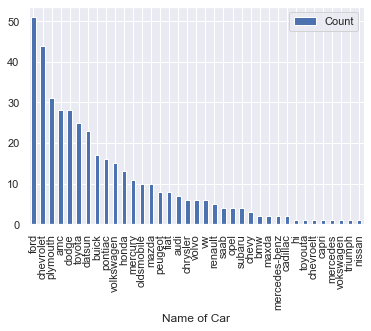

In [65]:
#This will check to see if the first and second words of the cars' names are similar
def similar(first_word,second_word):
    if sorted(first_word)==sorted(second_word):
        return True
    return False

#Dictionary to store the keys and values of the car_name column
cars_dict={}

# for loop checks the name of each car
for index, row in df.iterrows():
    cars= row['car_name']
    cars=cars.split()[0]
    #if the name of the car exists, you increment it towards the dictionary's counter
    if cars in cars_dict:
        cars_dict[cars] = cars_dict[cars] + 1 
    #if the name of the car doesn't exist, you would add it in the dictionary itself
    else:
        for car in cars_dict.keys():
            if similar(car,cars):
                cars_dict[car] = cars_dict[car] + 1
        else:
            cars_dict[cars] = 1

#Sorting the dictionary from largest to smallest to show the range of quantity of values
cars_dict= dict(sorted(cars_dict.items(), key=lambda x: x[1], reverse=True) )

#Creating the Bar Plot
cars_list=list(cars_dict.keys())
cars_count=list(cars_dict.values())
cars_df = pd.DataFrame({'Name of Car':  cars_list, 'Count': cars_count})
cars_dim = cars_df.plot.bar(x='Name of Car', y='Count',rot=0)
plt.xticks(rotation=90)

### 2: [10pt]

Allowed libraries: pandas

(a) Lets assume that the goal is to classify the cars into 3 categories based on the weight attribute: light, medium, and heavy. Discover the threshold for each category, so that all samples are divided into three equally-sized bins.

(b) Next, plot a histogram to show the count of observations in each bin.

In [32]:
#Part A
#Dividing ranges of weights into thresholds
#First step would be to sort values to determine the proper order
df.sort_values(by=['weight'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
54,35.0,4,72.0,69.00,1613.0,18.0,71,3,datsun 1200
144,31.0,4,76.0,52.00,1649.0,16.5,74,3,toyota corona
343,39.1,4,79.0,58.00,1755.0,16.9,81,3,toyota starlet
345,35.1,4,81.0,60.00,1760.0,16.1,81,3,honda civic 1300
53,31.0,4,71.0,65.00,1773.0,19.0,71,3,toyota corolla 1200
...,...,...,...,...,...,...,...,...,...
95,12.0,8,455.0,225.0,4951.0,11.0,73,1,buick electra 225 custom
90,12.0,8,429.0,198.0,4952.0,11.5,73,1,mercury marquis brougham
42,12.0,8,383.0,180.0,4955.0,11.5,71,1,dodge monaco (sw)
103,11.0,8,400.0,150.0,4997.0,14.0,73,1,chevrolet impala


In [5]:
#Second step, find summary statistics of weight column
df["weight"].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

In [12]:
#Final Step, create a column for df where it splits the levels of weights into 3 categories using .qcut()
df["weight_cut"] = pd.cut(df['weight'], 3, labels= ["light", "medium", "heavy"])
df["weight_cut"]

0      medium
1      medium
2      medium
3      medium
4      medium
        ...  
393    medium
394     light
395     light
396     light
397     light
Name: weight_cut, Length: 398, dtype: category
Categories (3, object): [light < medium < heavy]

In [13]:
#Checking Value Counts to see how much exists in each label
df['weight_cut'].value_counts()

light     195
medium    138
heavy      65
Name: weight_cut, dtype: int64

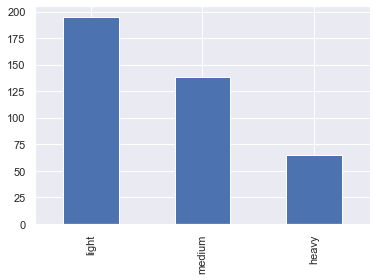

In [16]:
#Part B
#Creating the historgram of 3 bins
df['weight_cut'].value_counts().plot(kind='bar')

### 3: [10pt]

Allowed libraries: pandas, seaborn

(a) Create a 2D correlation matrix plot, similar to this example (https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07 and use seaborn library. You may use any published code to perform this.

(b) Describe the correlations between any two pairs of attributes in the dataset and why it does or does not match your expectation. (i.e., positive or negative correlation)


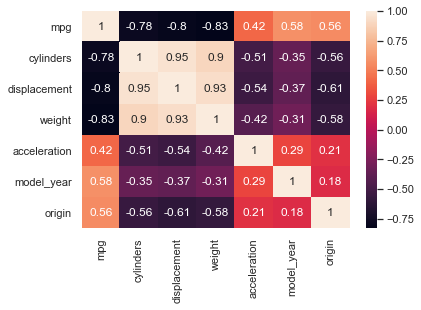

In [9]:
#Part A
#Correlation Matrix
sns.heatmap(df.corr(), annot = True)

## Part B Answer

I would say a pair that I'm not too surprsed about regarding correlation level would be between columns "mpg" and "model_year" (has a correlation of 0.58) since the younger the car is throught the advancements of technology, the faster the car will most likely be. The pair that I was actually suprised about was the correlation level be "weight" and "mpg" (has a correlation of -0.83) is because usually heavier cars will most likely travel slower in a natural sense due to a restriction in kinetic energy (engery that relates to a speed of an object in inclines normally), but I see that this really has a week affect on each other.

### 4: [20pt]

Allowed libraries: pandas, numpy

(a) Write a linear regression solver that can accommodate polynomial basis functions on a single variable for prediction of weight. Your code should use the Ordinary Least Squares (OLS) estimator (i.e. the Maximum-likelihood estimator). Code this from scratch. Its recommended to use a library (e.g. numpy) for basic linear algebra operations (addition,multiplication and inverse).

In [43]:
#OLS solver Function (This will be for homework 2)
#class LinearRegression:
    #def __init__(self):
        #self.b = []
        #x = np.array().reshape(-1,1)
        #self.x = x
        #y = np.array()
        #self.y = y
        #order = np.array()
        #self.order = order
        #X = np.c_[np.ones(len(x)), x , np.square(x)]
        #self.X = X
        #b = np.linalg.inv(X.T@X)@(X.T@y)
        #self.b = b
        #x_test = np.array()
        #self.x_test = x_test
        #y_test = np.array()
        #self.y_test = y_test
        #x_0 = x_test[0]
        #self.x_0 = x_0
        #y_0 = y_test[0]
        #self.y_0 = y_0
        #prediction = b[0] + b[1] * x_0 + b[2] * x_0**2
        #self.prediction = prediction
    #def fit(self, x, y, order):
        #x = np.array().reshape(-1,1)
        #self.x = x
        #y = np.array()
        #self.y = y
        #self.order = np.array([0,1,2,3])
        #if order == 0:
            #X = np.c_[np.ones(len(x))]
        #elif order == 1:
            #X = np.c_[np.ones(len(x)), x]
        #elif order == 2:
            #X = np.c_[np.ones(len(x)), x , np.square(x)]
        #else:
            #X = X = np.c_[np.ones(len(x)), x , np.square(x), np.power(x, 3)]
        #y = order*x + b
        #b = np.linalg.inv(X.T@X)@(X.T@y)
        #self.b = b
    #def predict(self, x):
        #self.order = np.array([0,1,2,3])
        #if order == 0:
            #predict = b[0]
        #elif order == 1:
            #predict = b[0] + b[1] * x
        #elif order == 2:
            #predict = b[0] + b[1] * x + b[2] * x**2
        #else:
            #predict = b[0] + b[1] * x + b[2] * x**2 + b[3] * x**3
        #b[0] + b[1] * x + b[2] * x**2 
    #def mse(self, y, prediction):
        #self.order = np.array([0,1,2,3])
        #if order == 0:
            #prediction = b[0]
        #elif order == 1:
            #prediction = b[0] + b[1] * x
        #elif order == 2:
            #prediction = b[0] + b[1] * x + b[2] * x**2
        #else:
            #prediction = b[0] + b[1] * x + b[2] * x**2 + b[3] * x**3
        #return(np.mean((y - prediction)**2))

In [46]:
#Setting up regression models for differnt Polynomial cases 
#Start at polynomial 0 and finding b
x = np.array(df["acceleration"]).reshape(-1,1)
y = np.array(df["mpg"])
X_0 = np.c_[np.ones(len(x))]
b0 = np.linalg.inv(X_0.T@X_0)@(X_0.T@y)
b0

array([23.51457286])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


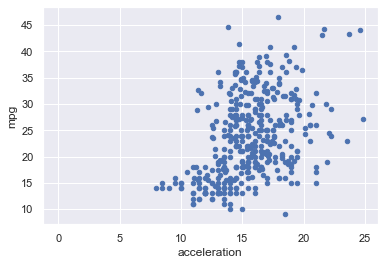

In [60]:
#Plot of Dimension 0
fy_0 = b0[0]
ax0 = df.plot.scatter(x='acceleration', y='mpg')
ax0.plot(fy_0, 'r')

In [68]:
#Predicting the Dependent Variable of degree 0
x_test = np.array(df['acceleration'][23:])
y_test = np.array(df['mpg'][23:])
x_0 = x_test[0]
y_0 = y_test[0]
pred0 = b0[0]
pred0

23.514572864321607

In [69]:
#Finding mse of degree 0
mse0 = (y_0 - pred0) ** 2
mse0

6.1773480467664985

In [56]:
#Regression Analysis at Degree 1
#b at Degree 1
X_1 = np.c_[np.ones(len(x)), x]
b1 = np.linalg.inv(X_1.T@X_1)@(X_1.T@y)
b1

array([4.969793  , 1.19120453])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


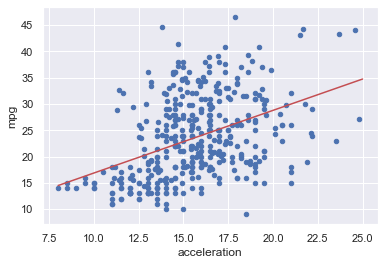

In [61]:
#Plot of Dimension 1
fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
fy_1 = b1[0] + b1[1] * fx
ax1 = df.plot.scatter(x='acceleration', y='mpg')
ax1.plot(fx, fy_1, 'r')

In [71]:
#Predicting the Dependent Variable of degree 1
pred1 = b1[0] + b1[1] * x_0
pred1

19.859849621131655

In [72]:
#Finding mse of degree 1
mse1 = (y_0 - pred1) ** 2
mse1

37.70144667511708

In [73]:
#Regression Analysis at Degree 2
#b at Degree 2
X_2 = np.c_[np.ones(len(x)), x, np.square(x)]
b2 = np.linalg.inv(X_2.T@X_2)@(X_2.T@y)
b2

array([-16.13924914,   3.92097508,  -0.0855698 ])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


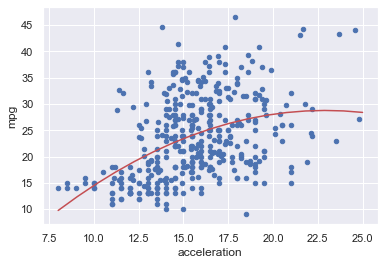

In [76]:
#Plot of Degree 2
fy_2 = b2[0] + b2[1] * fx + b2[2] * np.square(fx)
ax2 = df.plot.scatter(x='acceleration', y='mpg')
ax2.plot(fx, fy_2, 'r')

In [77]:
#Predicting the Dependent Variable of degree 2
pred2 = b2[0] + b2[1] * x_0 + b2[2] * x_0**2
pred2

19.502658018143347

In [78]:
#Finding mse of degree 2
mse2 = (y_0 - pred2) ** 2
mse2

42.21545282919694

In [79]:
#Regression Analysis at Degree 3
#b at Degree 3
X_3 = np.c_[np.ones(len(x)), x, np.square(x), np.power(x, 3)]
b3 = np.linalg.inv(X_3.T@X_3)@(X_3.T@y)
b3

array([-3.75291129e+01,  8.15913150e+00, -3.55985048e-01,  5.56473428e-03])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


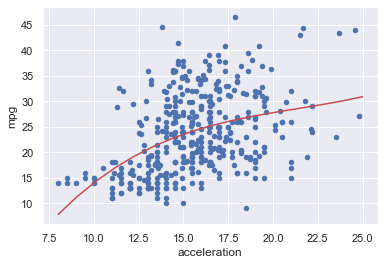

In [80]:
#Plot of Degree 3
fy_3 = b3[0] + b3[1] * fx + b3[2] * np.square(fx) + b3[3] * np.power(fx, 3)
ax3 = df.plot.scatter(x='acceleration', y='mpg')
ax3.plot(fx, fy_3, 'r')

In [82]:
#Predicting the Dependent Variable of degree 3
pred3 = b3[0] + b3[1] * x_0 + b3[2] * x_0**2 + b3[3] * x_0**3
pred3

19.70598881210961

In [83]:
#Finding mse of degree 3
mse3 = (y_0 - pred3) ** 2
mse3

39.614576833289405